# Heart Disease Prediction using LightGBM algorithm


In [ ]:
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

In [ ]:
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [ ]:
# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

In [ ]:
# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

In [ ]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458333 -> initscore=-0.167054
[LightGBM] [Info] Start training from score -0.167054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC and Precision-Recall curve

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Model Accuracy: {accuracy * 100:.2f}%")

LightGBM Model Accuracy: 83.33%


In [ ]:
# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



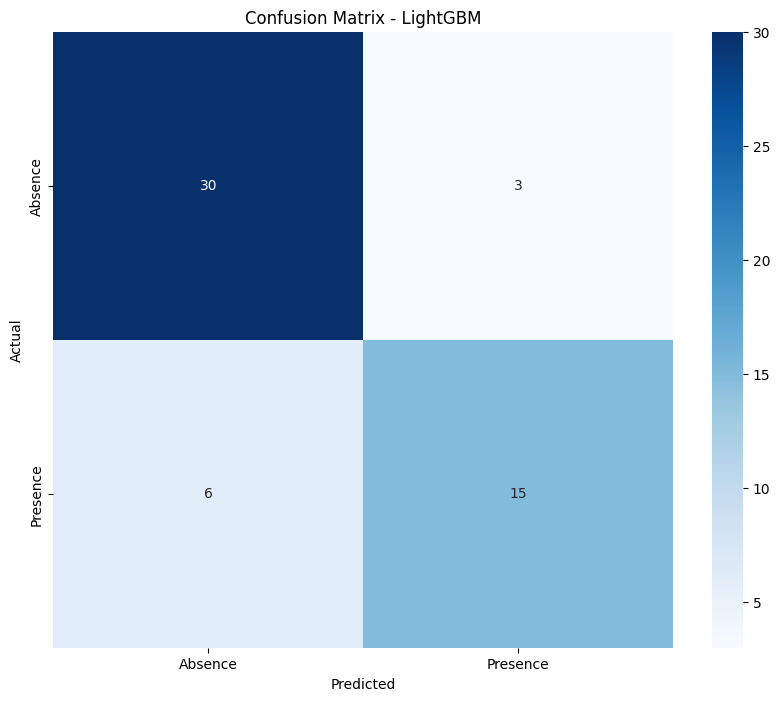

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - LightGBM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

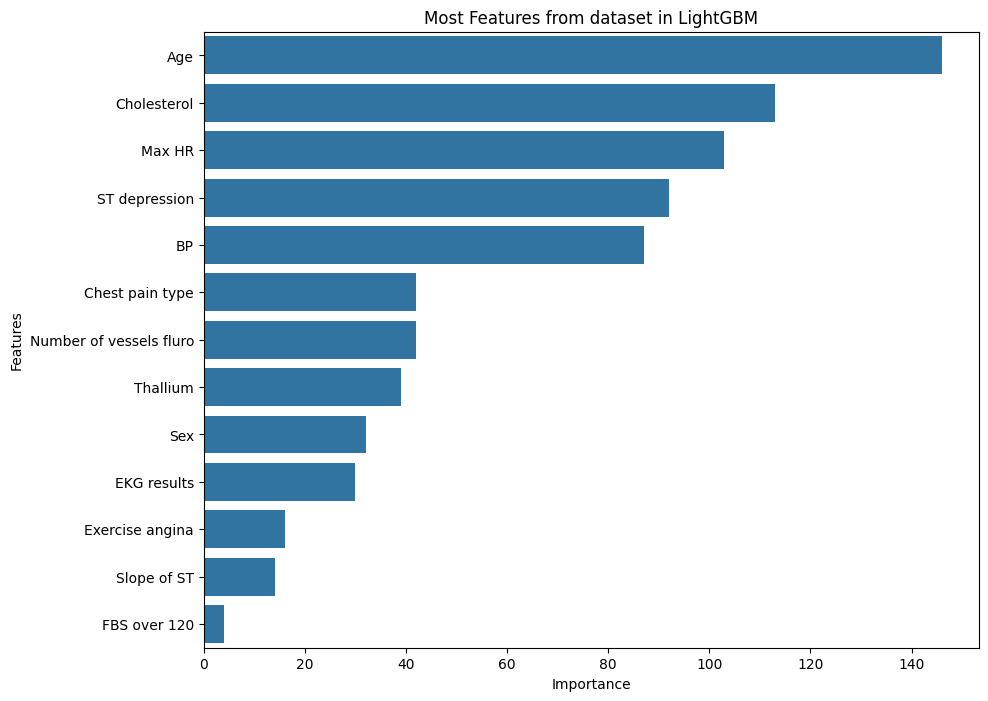

In [ ]:
# Features from the dataset that are the most important in the predciction model
feature_importances = pd.Series(lgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Most Features from dataset in LightGBM')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

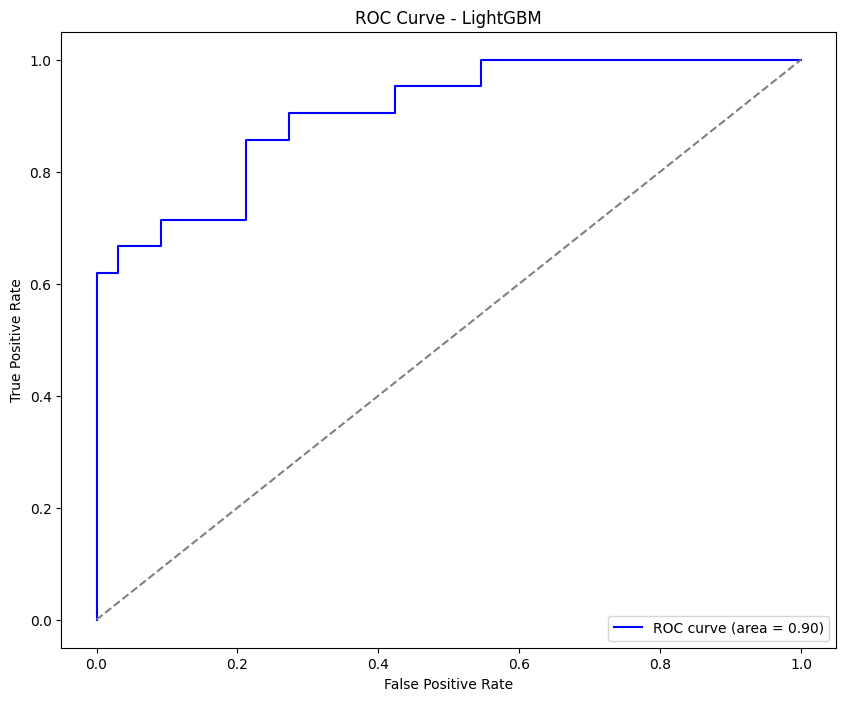

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.show()

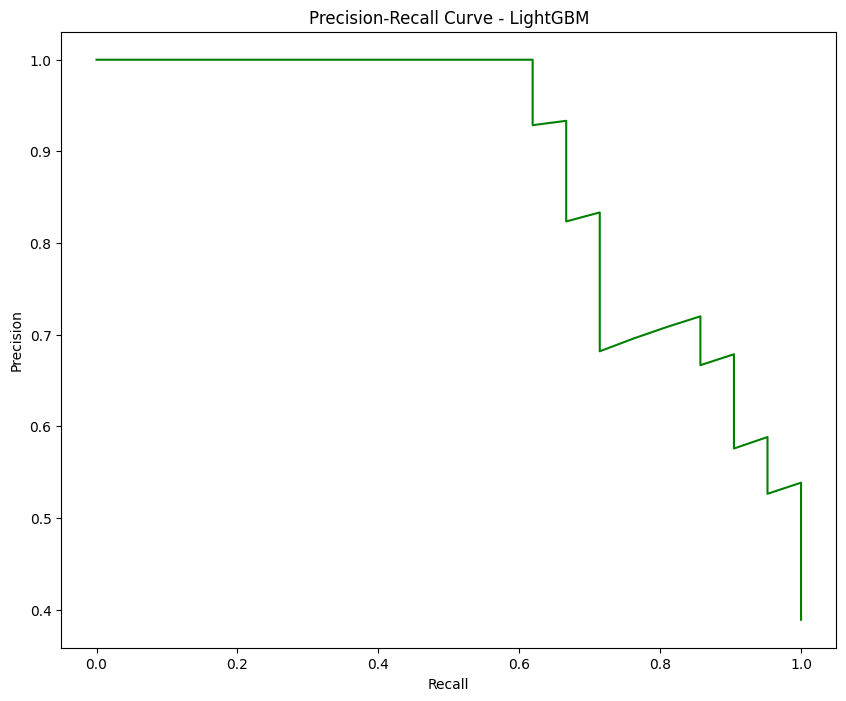

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LightGBM')
plt.show()

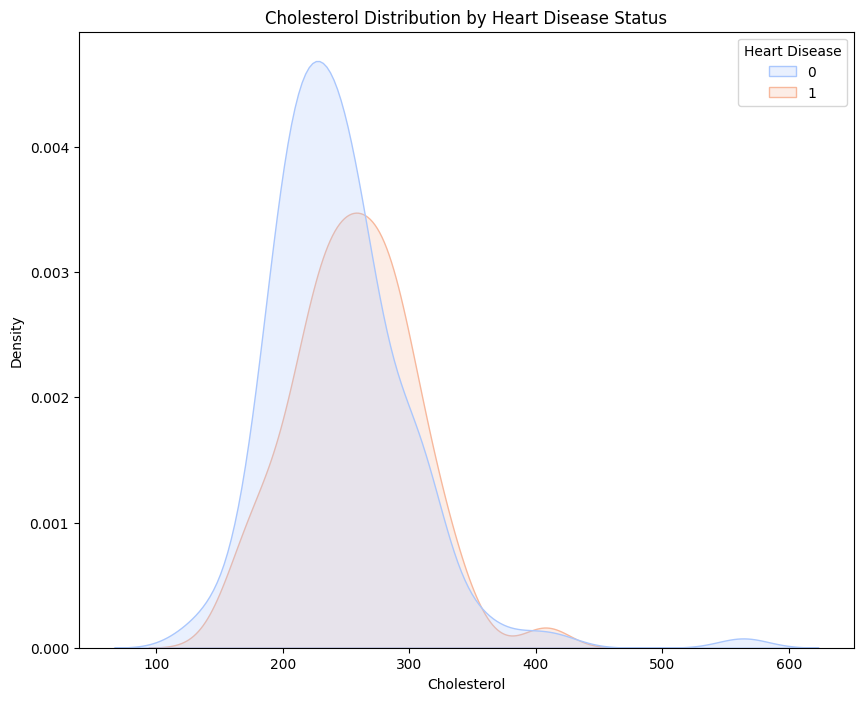

In [ ]:
# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

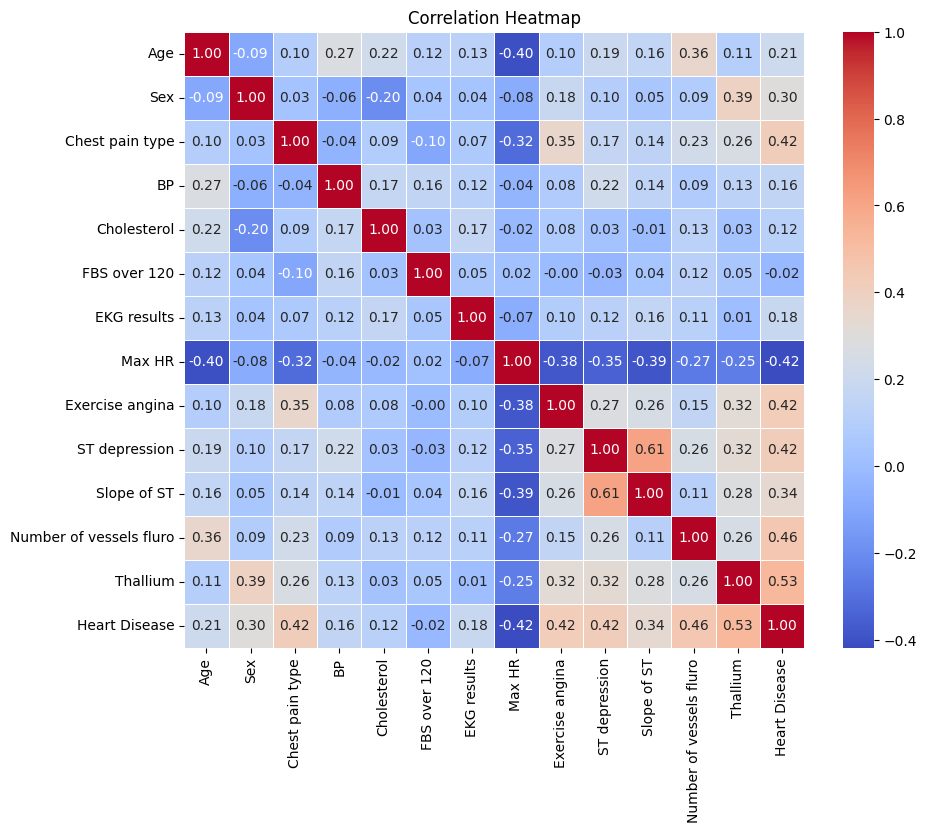

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4850 - loss: 0.7106
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 0.6282 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7505 - loss: 0.5886 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.5146 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4898 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.4423 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.4004 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8249 - loss: 0.4007 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3865 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3714 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.3625 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

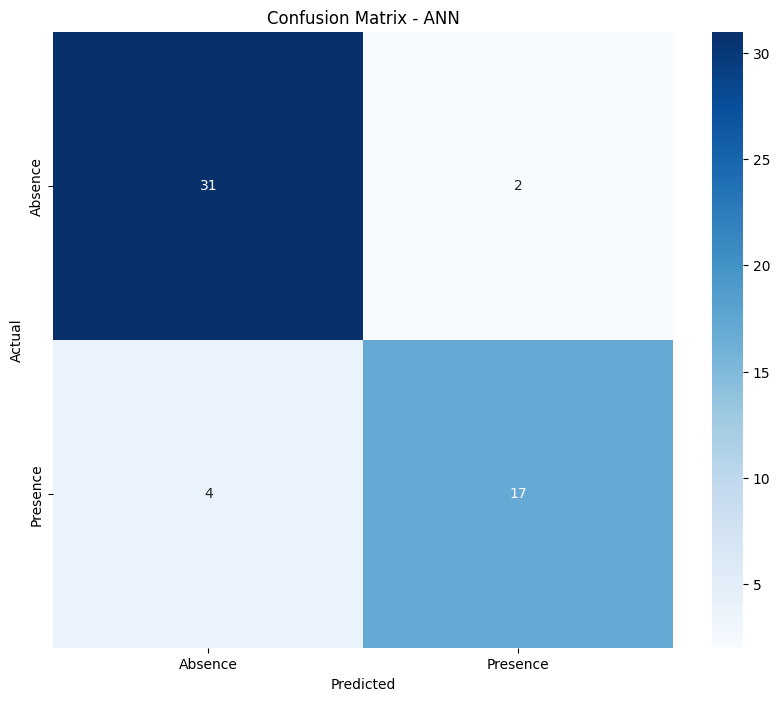

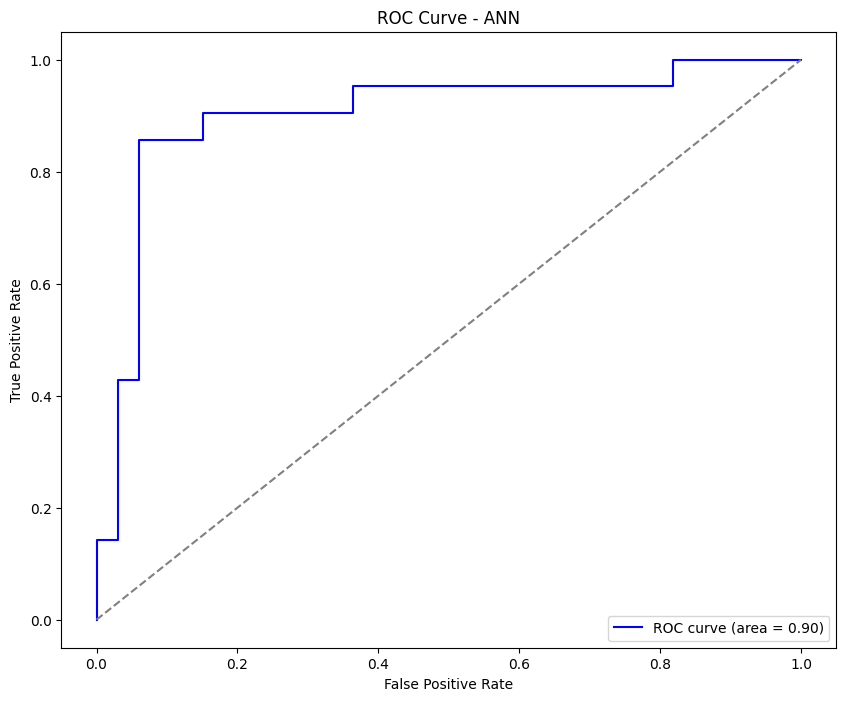

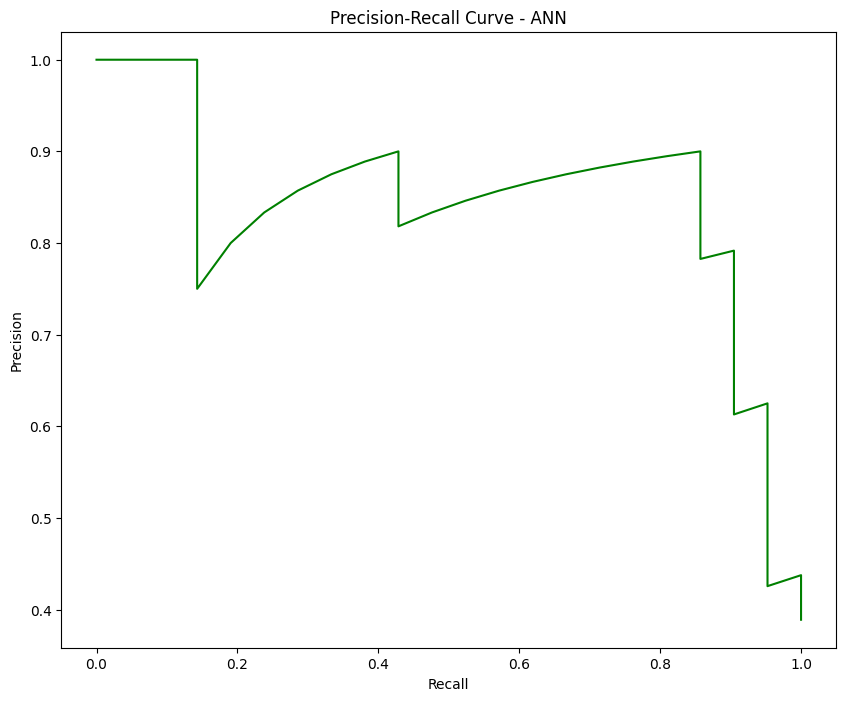

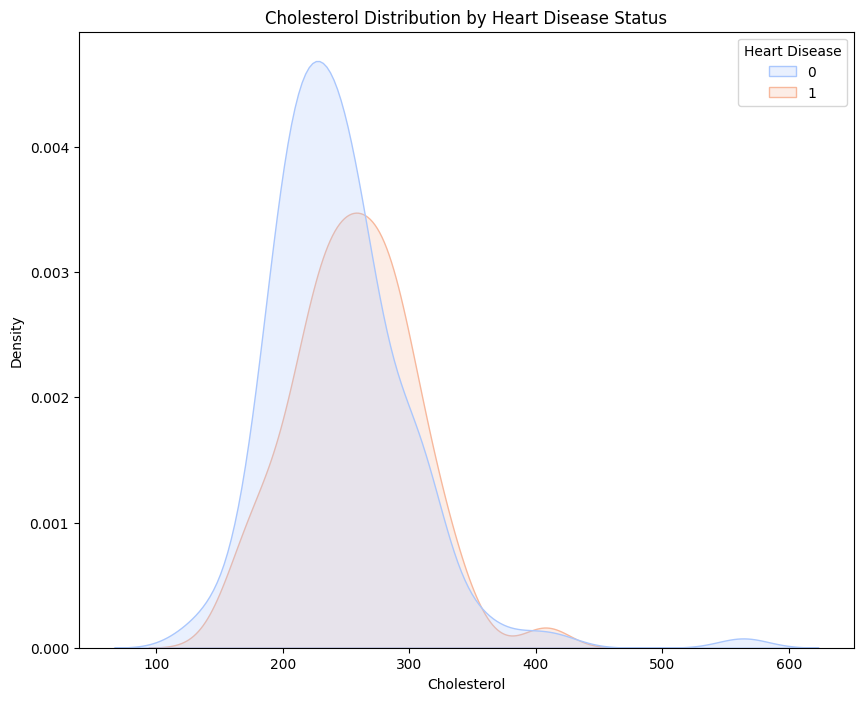

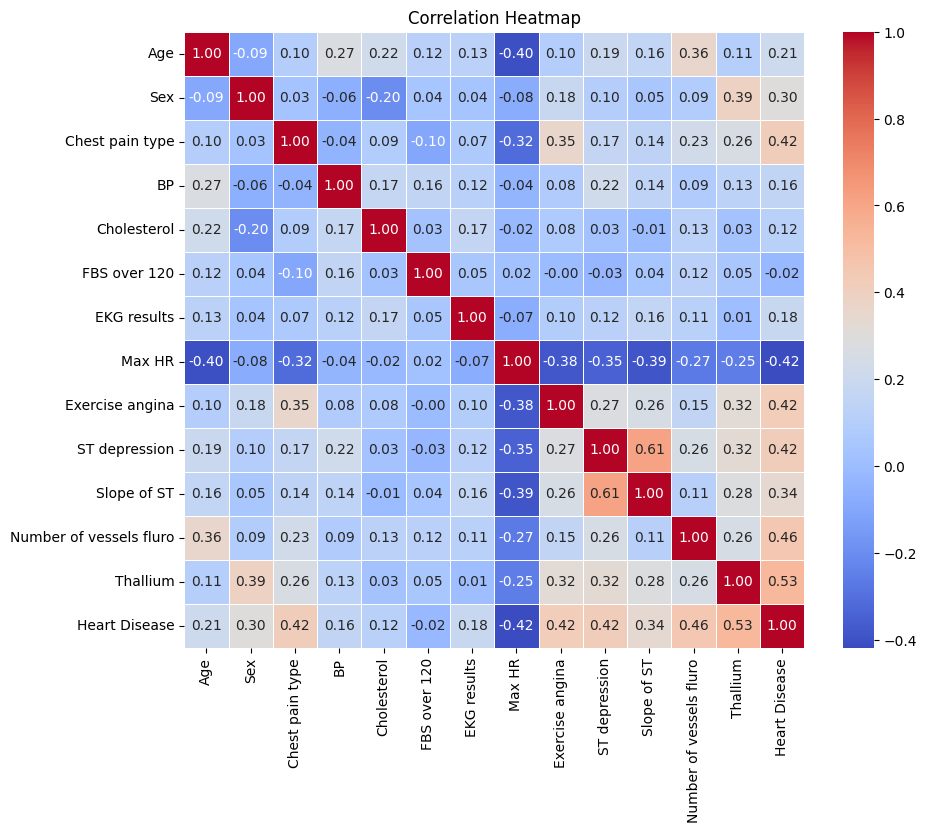

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and build the ANN model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - ANN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ANN')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7600 - loss: 0.5758
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8451 - loss: 0.5178 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.4715 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 0.4293 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.3924  
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3609 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.3356 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.3156 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.2996 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.2864  
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.2757 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

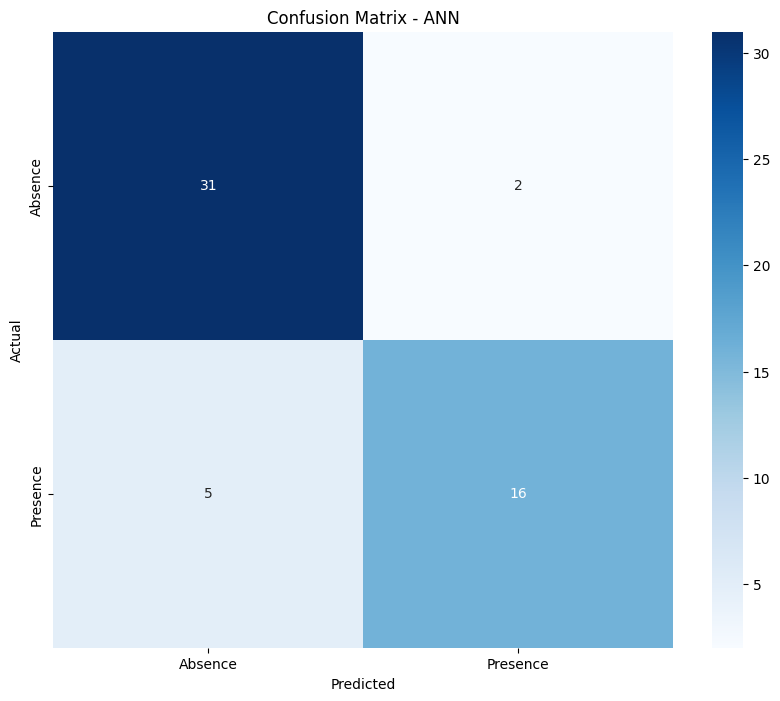

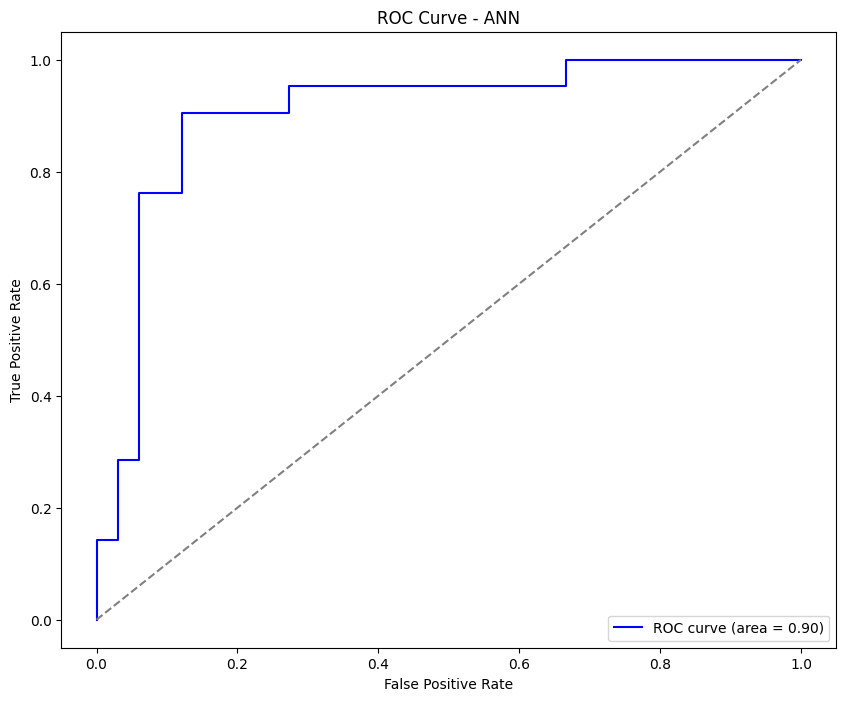

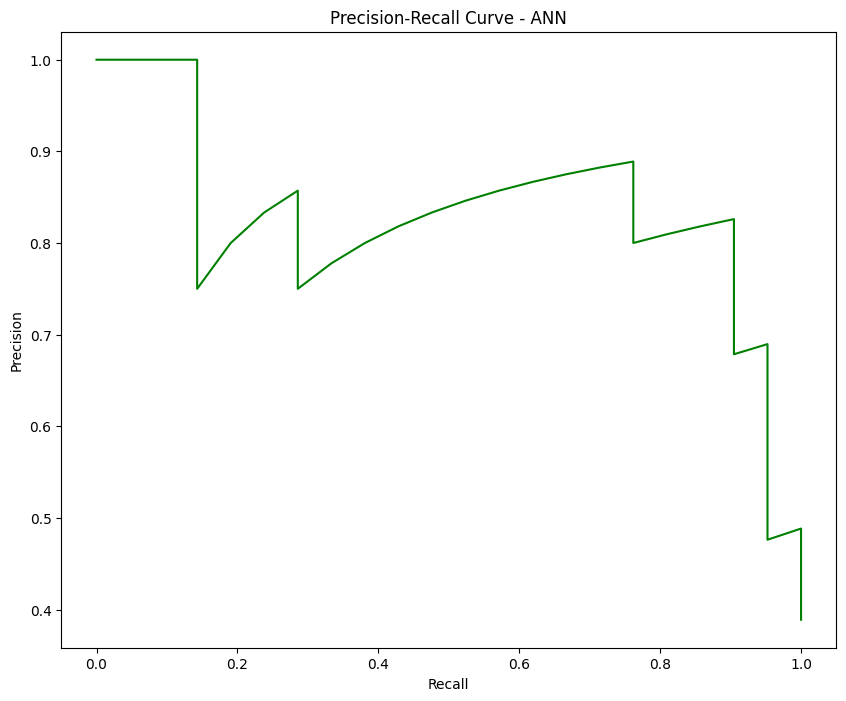

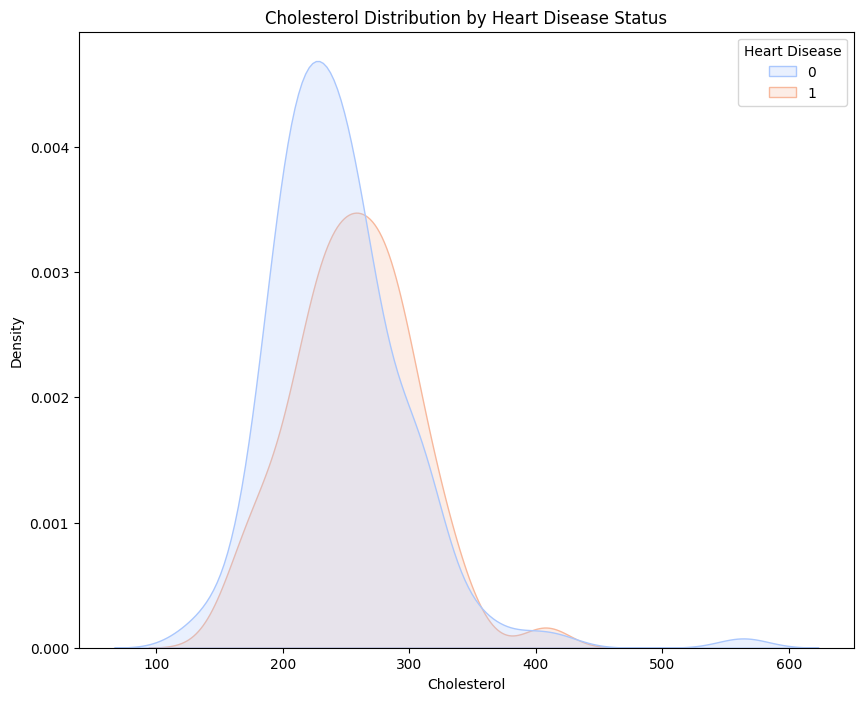

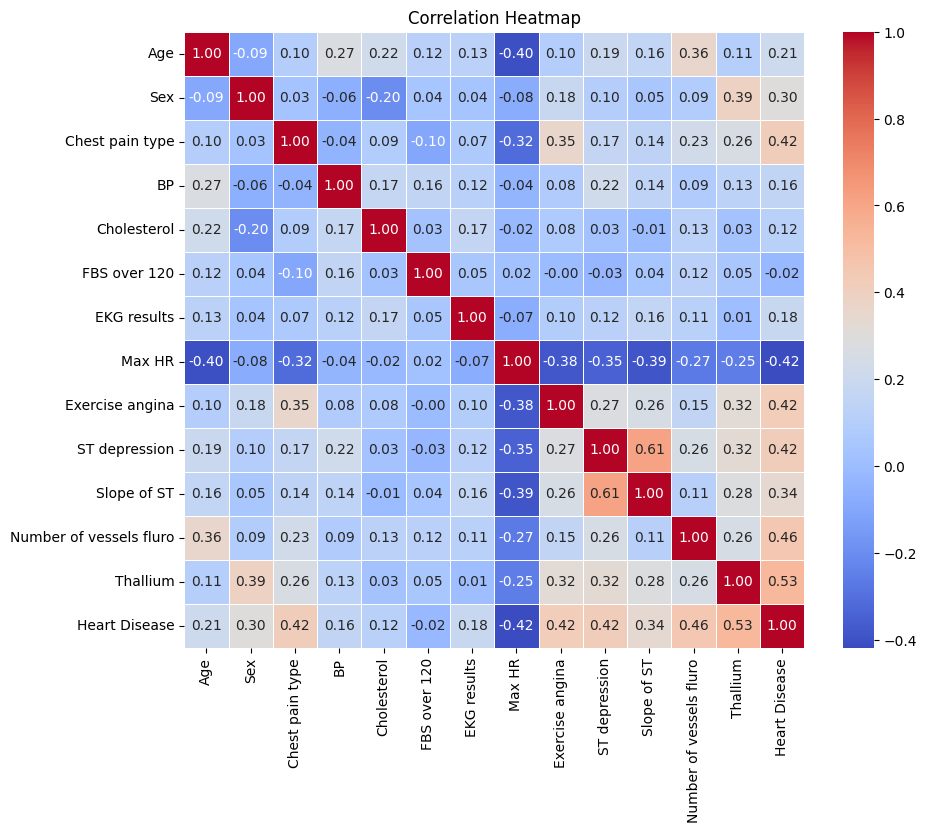

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and build the ANN model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - ANN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ANN')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


Trial 5 Complete [00h 00m 22s]
val_accuracy: 0.8636363546053568

Best val_accuracy So Far: 0.871212104956309
Total elapsed time: 00h 01m 51s
2/2 [==============================] - 0s 3ms/step
Best ANN Model Accuracy: 83.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



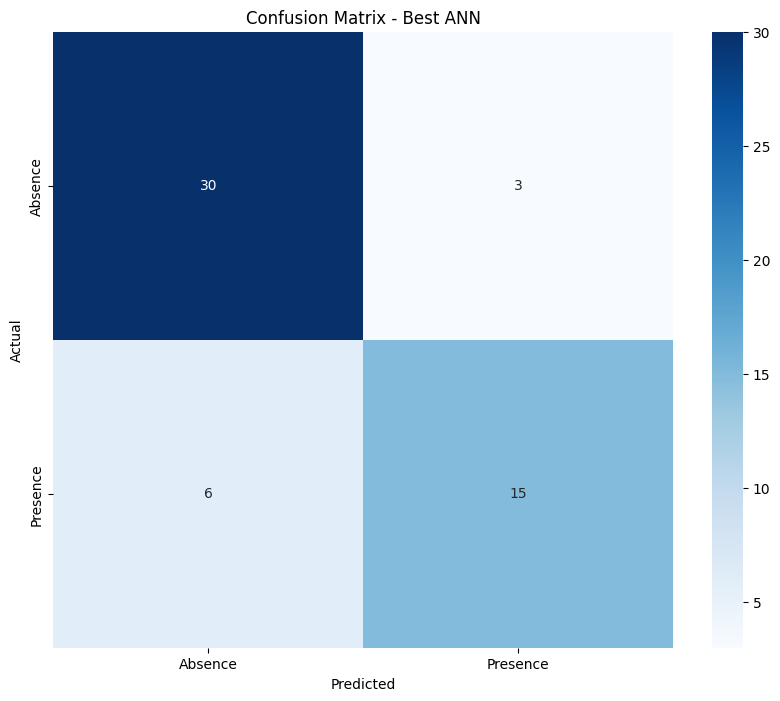

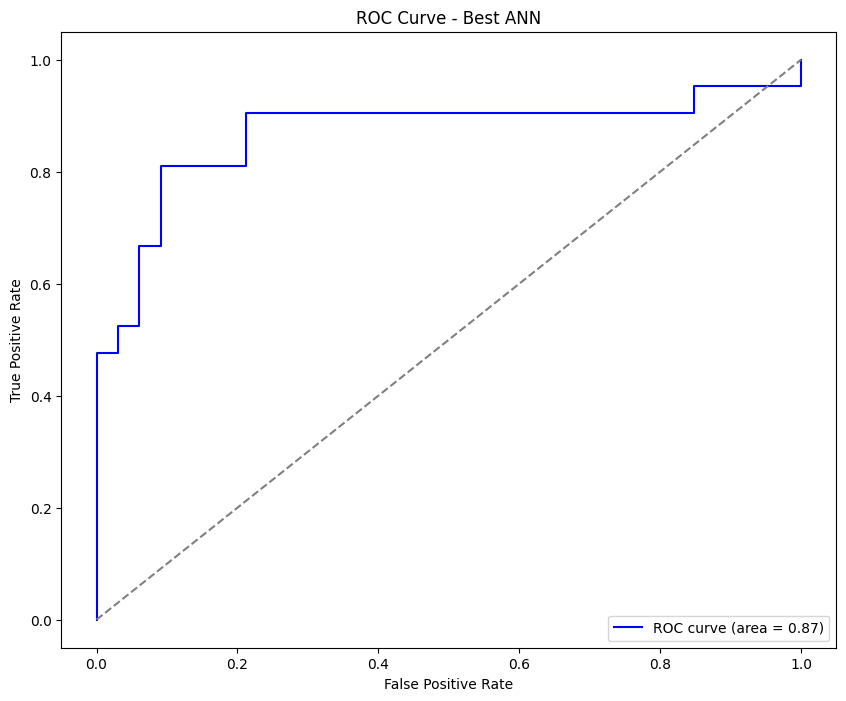

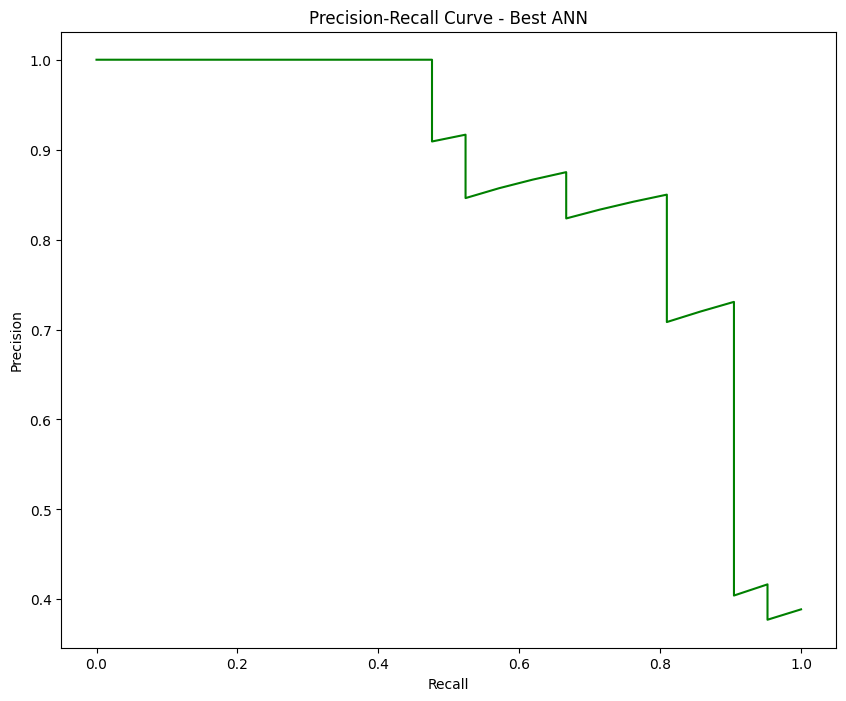

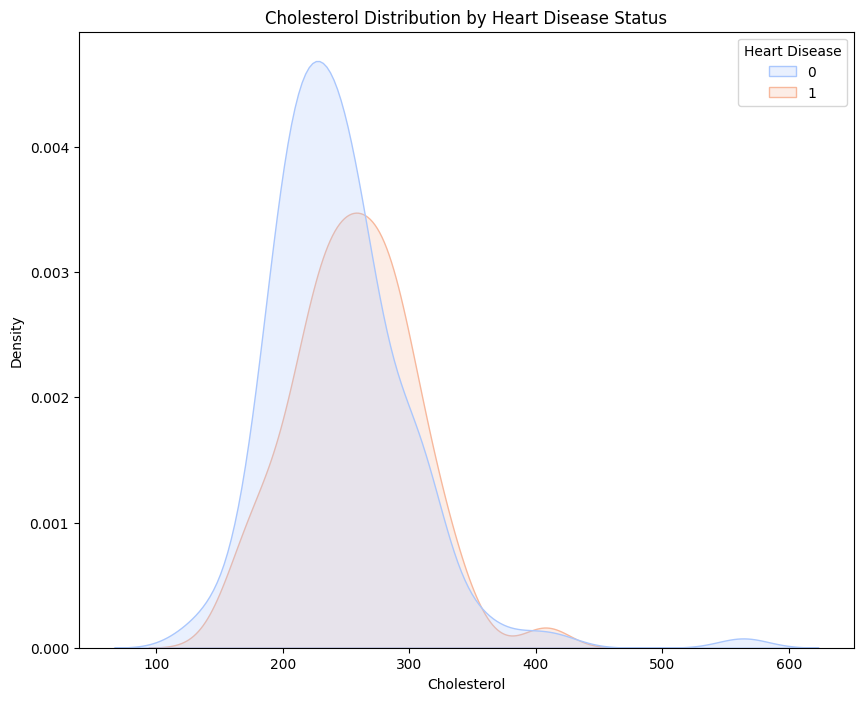

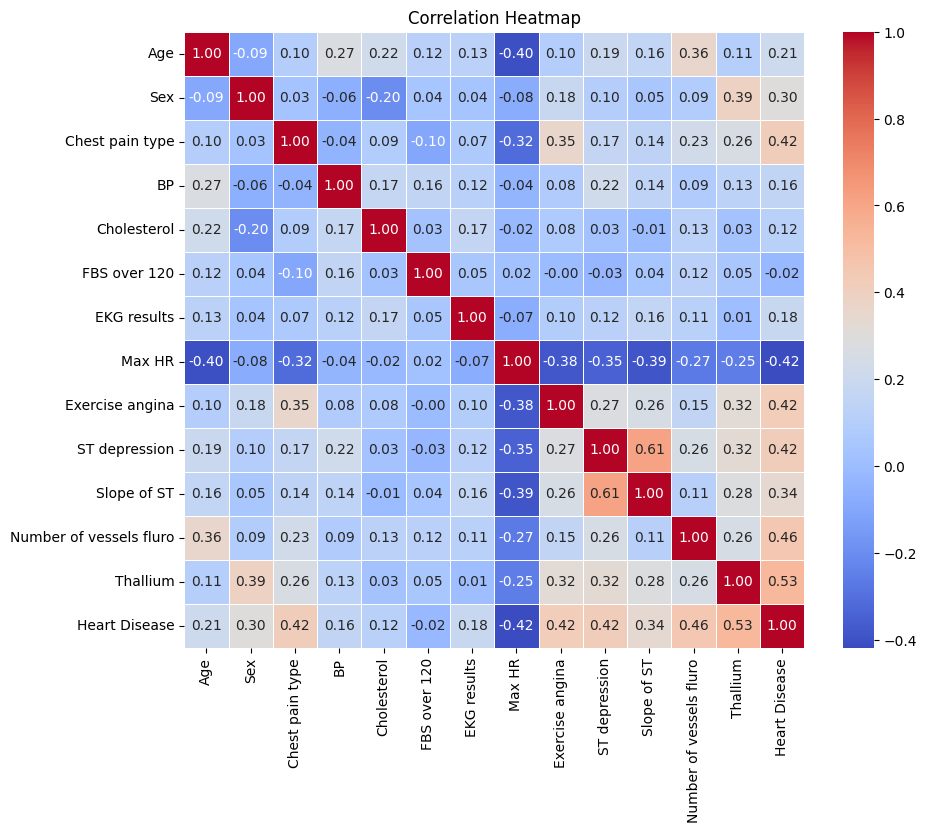

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a function to create the model
def build_model(hp):
    model = keras.Sequential()

    # Hyperparameter tuning for the number of layers and units
    for i in range(hp.Int('num_layers', 1, 3)):  # 1 to 3 layers
        model.add(layers.Dense(units=hp.Int(f'units_{i}', 8, 64, step=8), activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of different models to try
    executions_per_trial=3,
    directory='my_dir',
    project_name='heart_disease_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
y_pred_proba = best_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best ANN Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - Best ANN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best ANN')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best ANN')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


KNN Model Accuracy: 81.48%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54



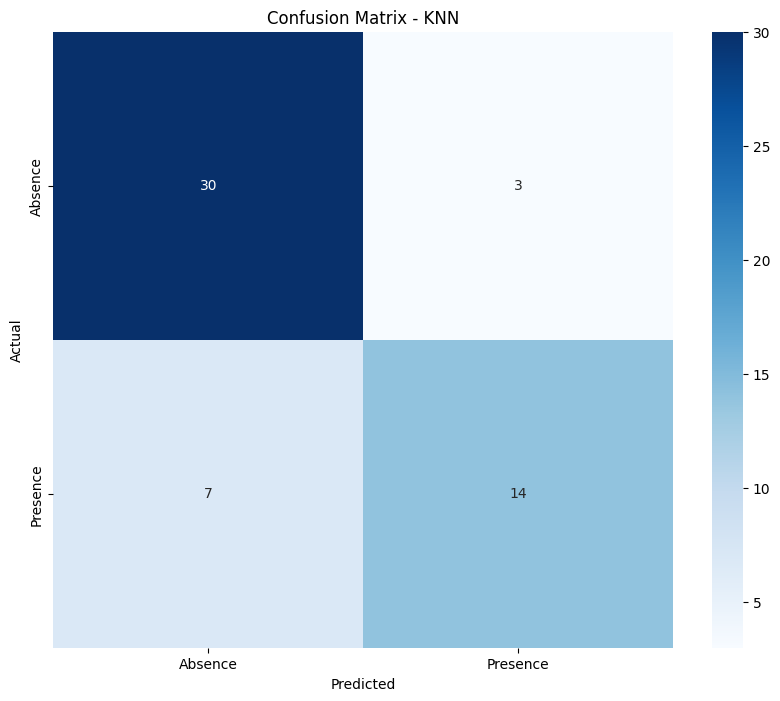

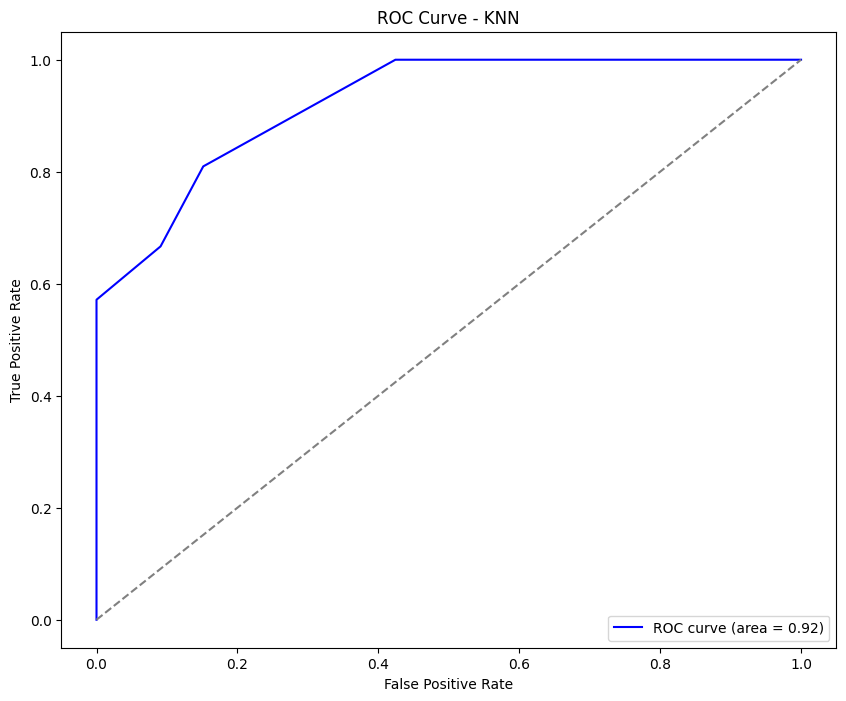

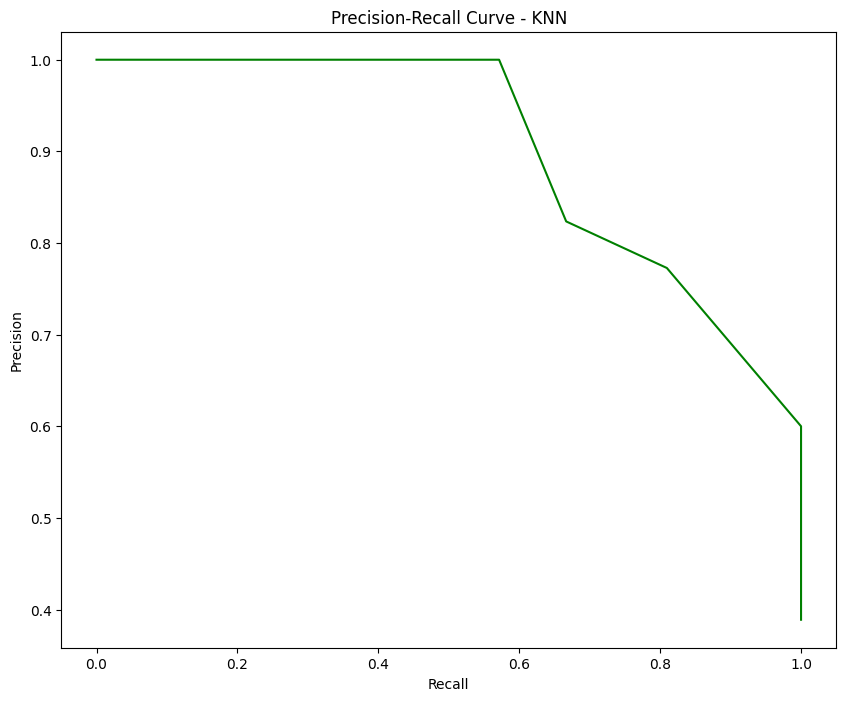

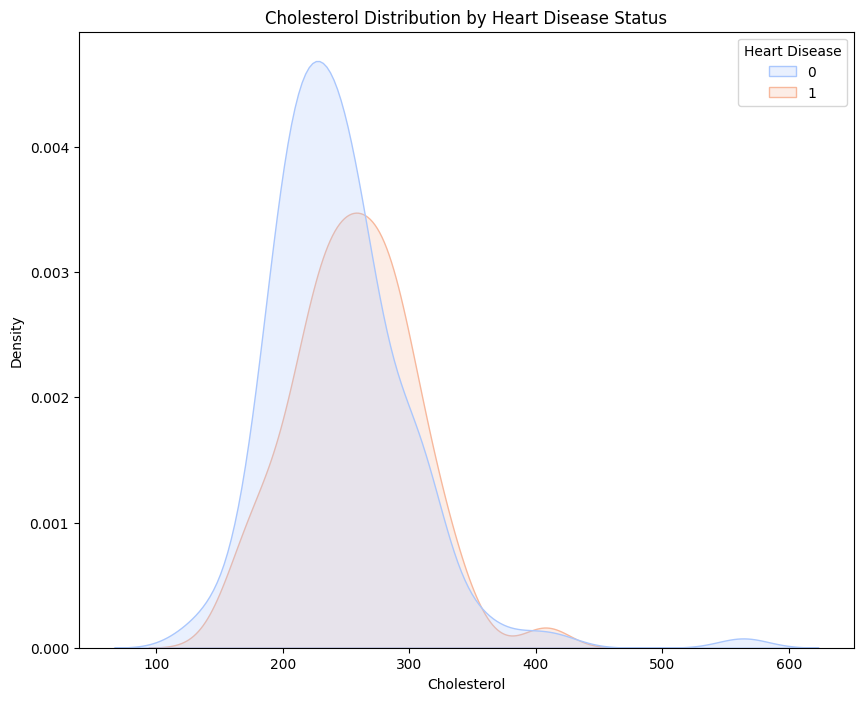

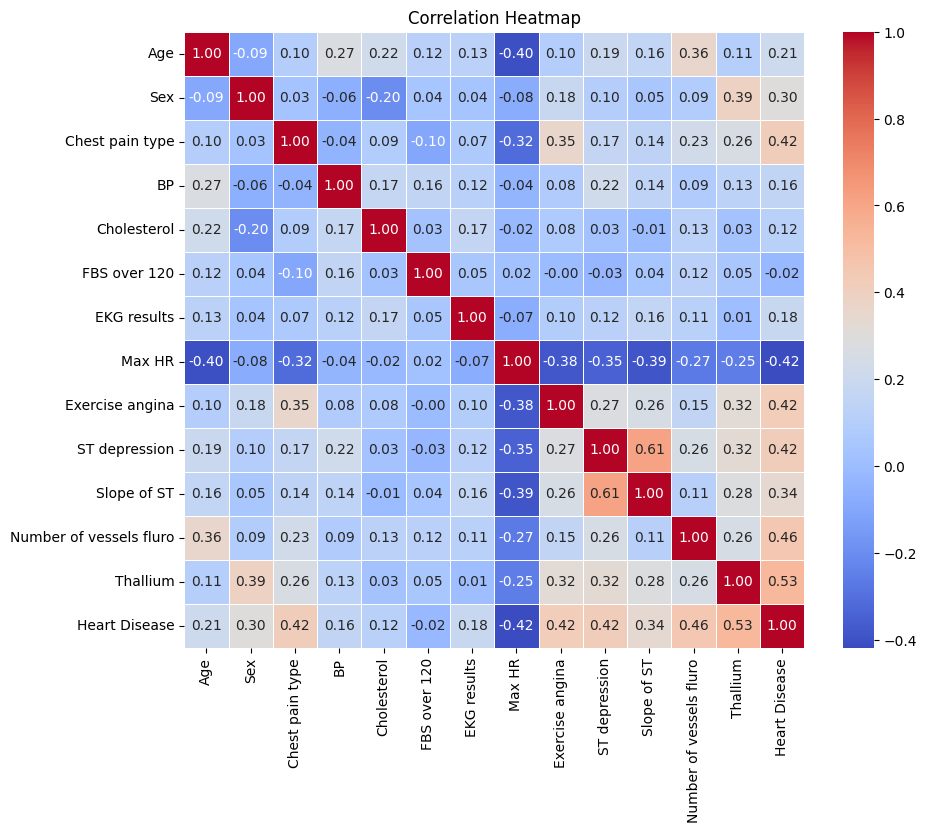

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set random seeds for reproducibility
np.random.seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - KNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Naive Bayes Model Accuracy: 90.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



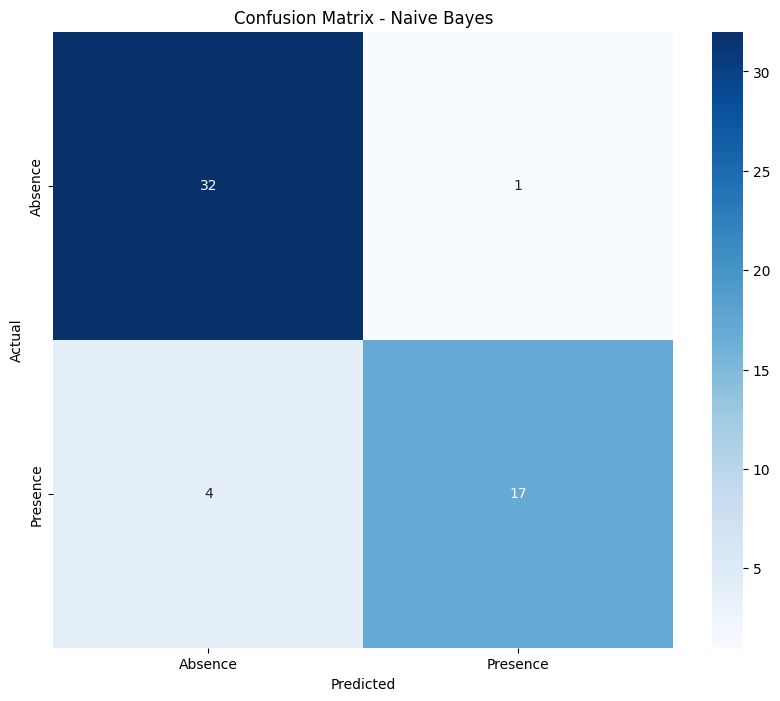

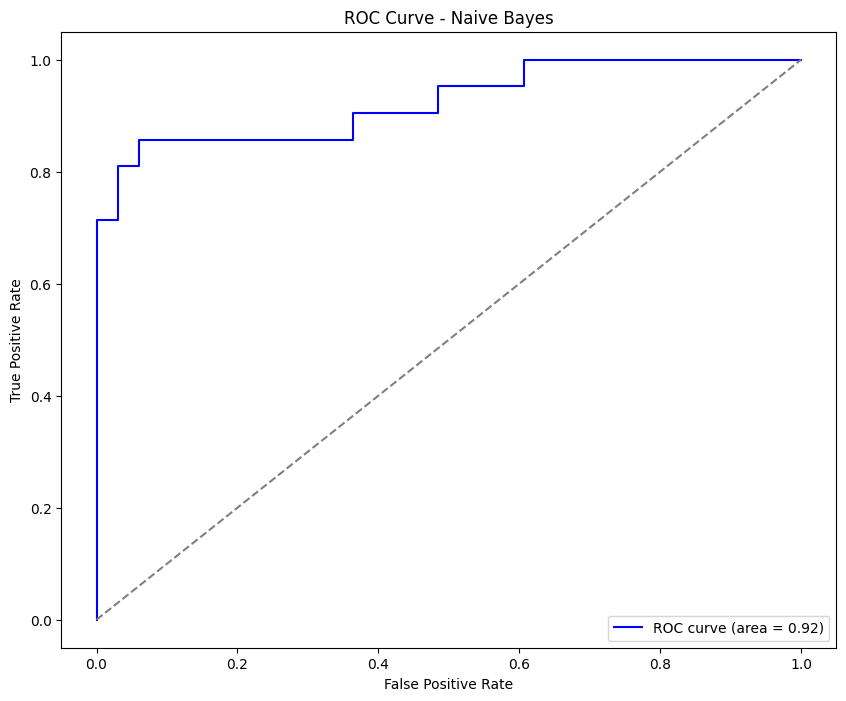

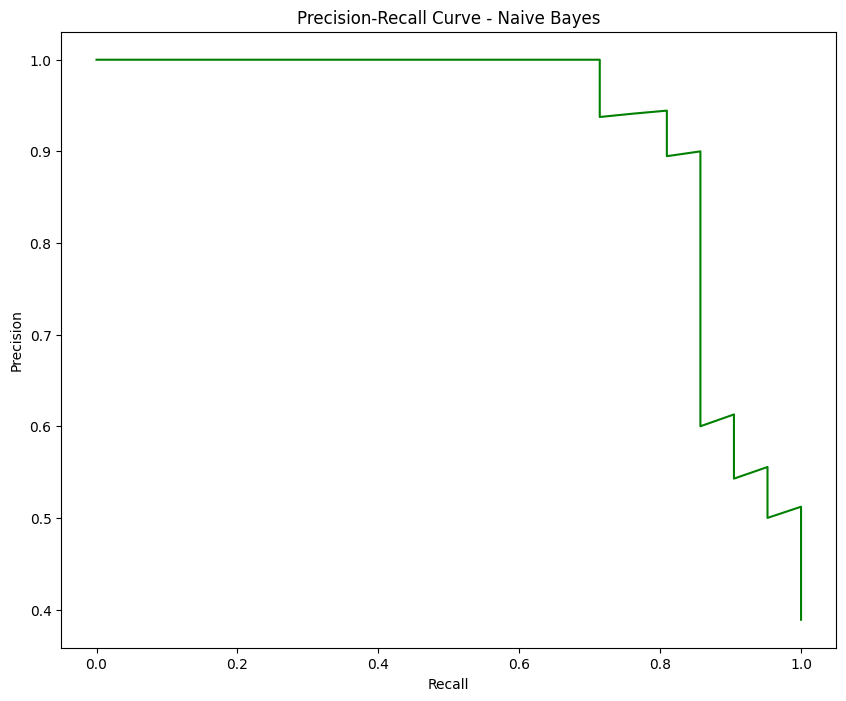

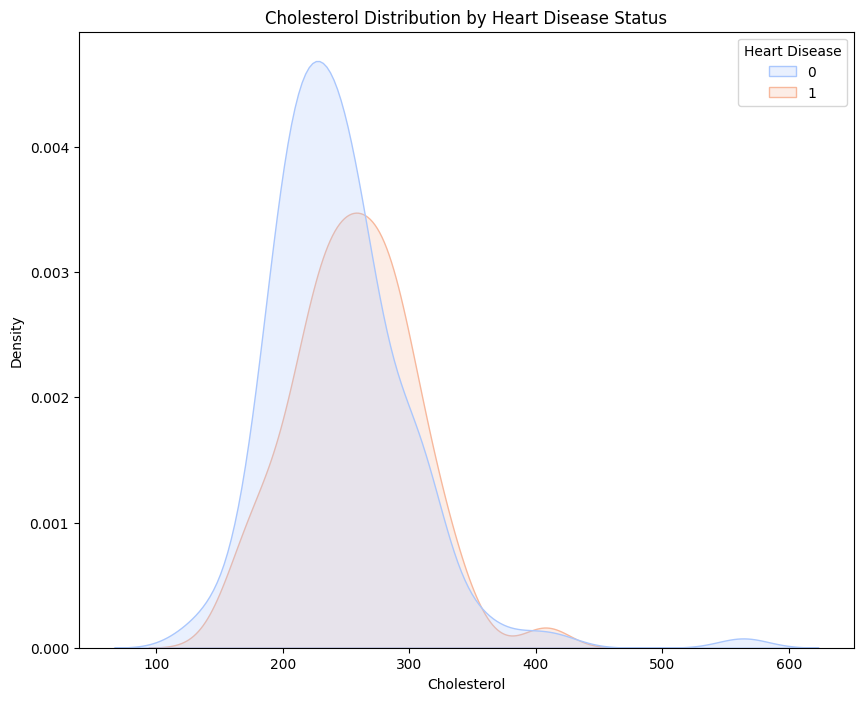

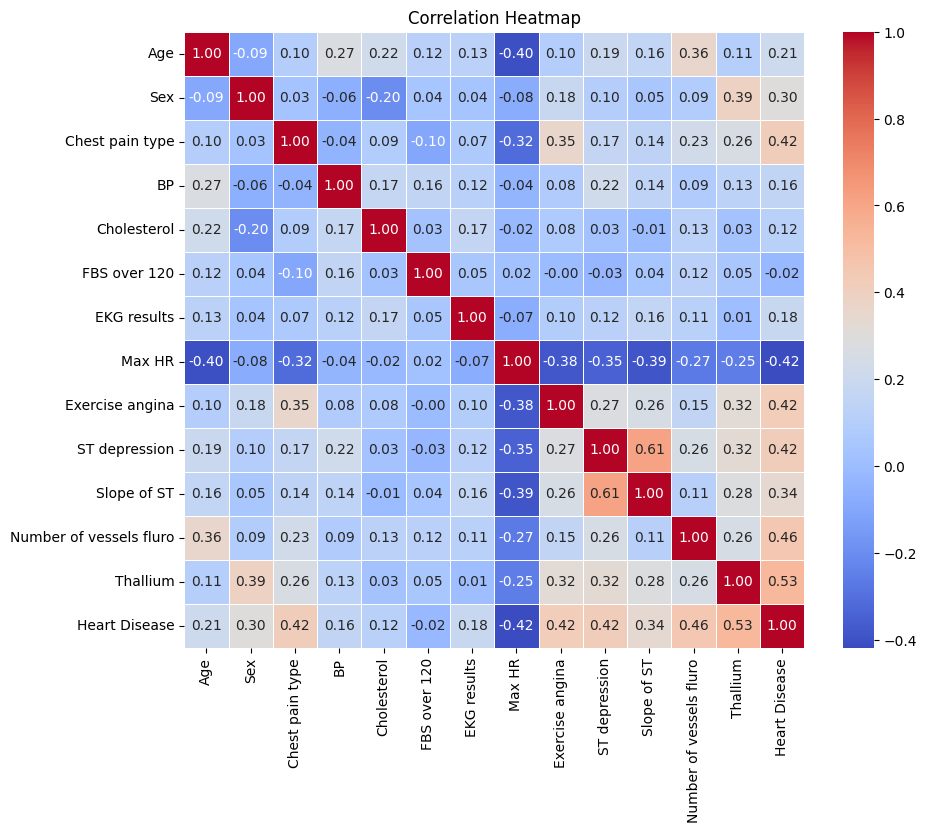

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Set random seeds for reproducibility
np.random.seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
!pip install sklearn_lvq


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn_lvq import LVQClassifier
import numpy as np

# Set random seeds for reproducibility
import numpy as np
np.random.seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the LVQ model
lvq = LVQClassifier(n_estimators=10, random_state=42)
lvq.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lvq.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LVQ Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - LVQ')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


ImportError: cannot import name 'LVQClassifier' from 'sklearn_lvq' (/usr/local/lib/python3.10/dist-packages/sklearn_lvq/__init__.py)

In [ ]:
from sklearn_lvq import LVQClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=4, n_classes=3, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LVQ classifier
lvq = LVQClassifier()

# Fit the model
lvq.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = lvq.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


ImportError: cannot import name 'LVQClassifier' from 'sklearn_lvq' (/usr/local/lib/python3.10/dist-packages/sklearn_lvq/__init__.py)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn_glvq

# Set random seeds for reproducibility
import numpy as np
np.random.seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the GLVQ model
glvq = GLVQClassifier()  # You can set additional parameters if needed
glvq.fit(X_train, y_train)

# Make predictions on the test set
y_pred = glvq.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"GLVQ Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - GLVQ')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


ModuleNotFoundError: No module named 'sklearn_glvq'

Naive Bayes

First few rows of the dataset:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence 

<ipython-input-2-1a00bd13cb32>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=data, palette='coolwarm')


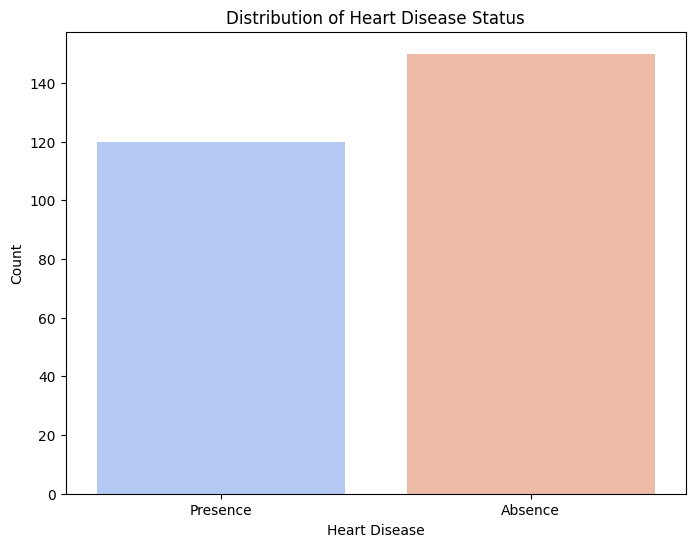

<Figure size 1200x800 with 0 Axes>

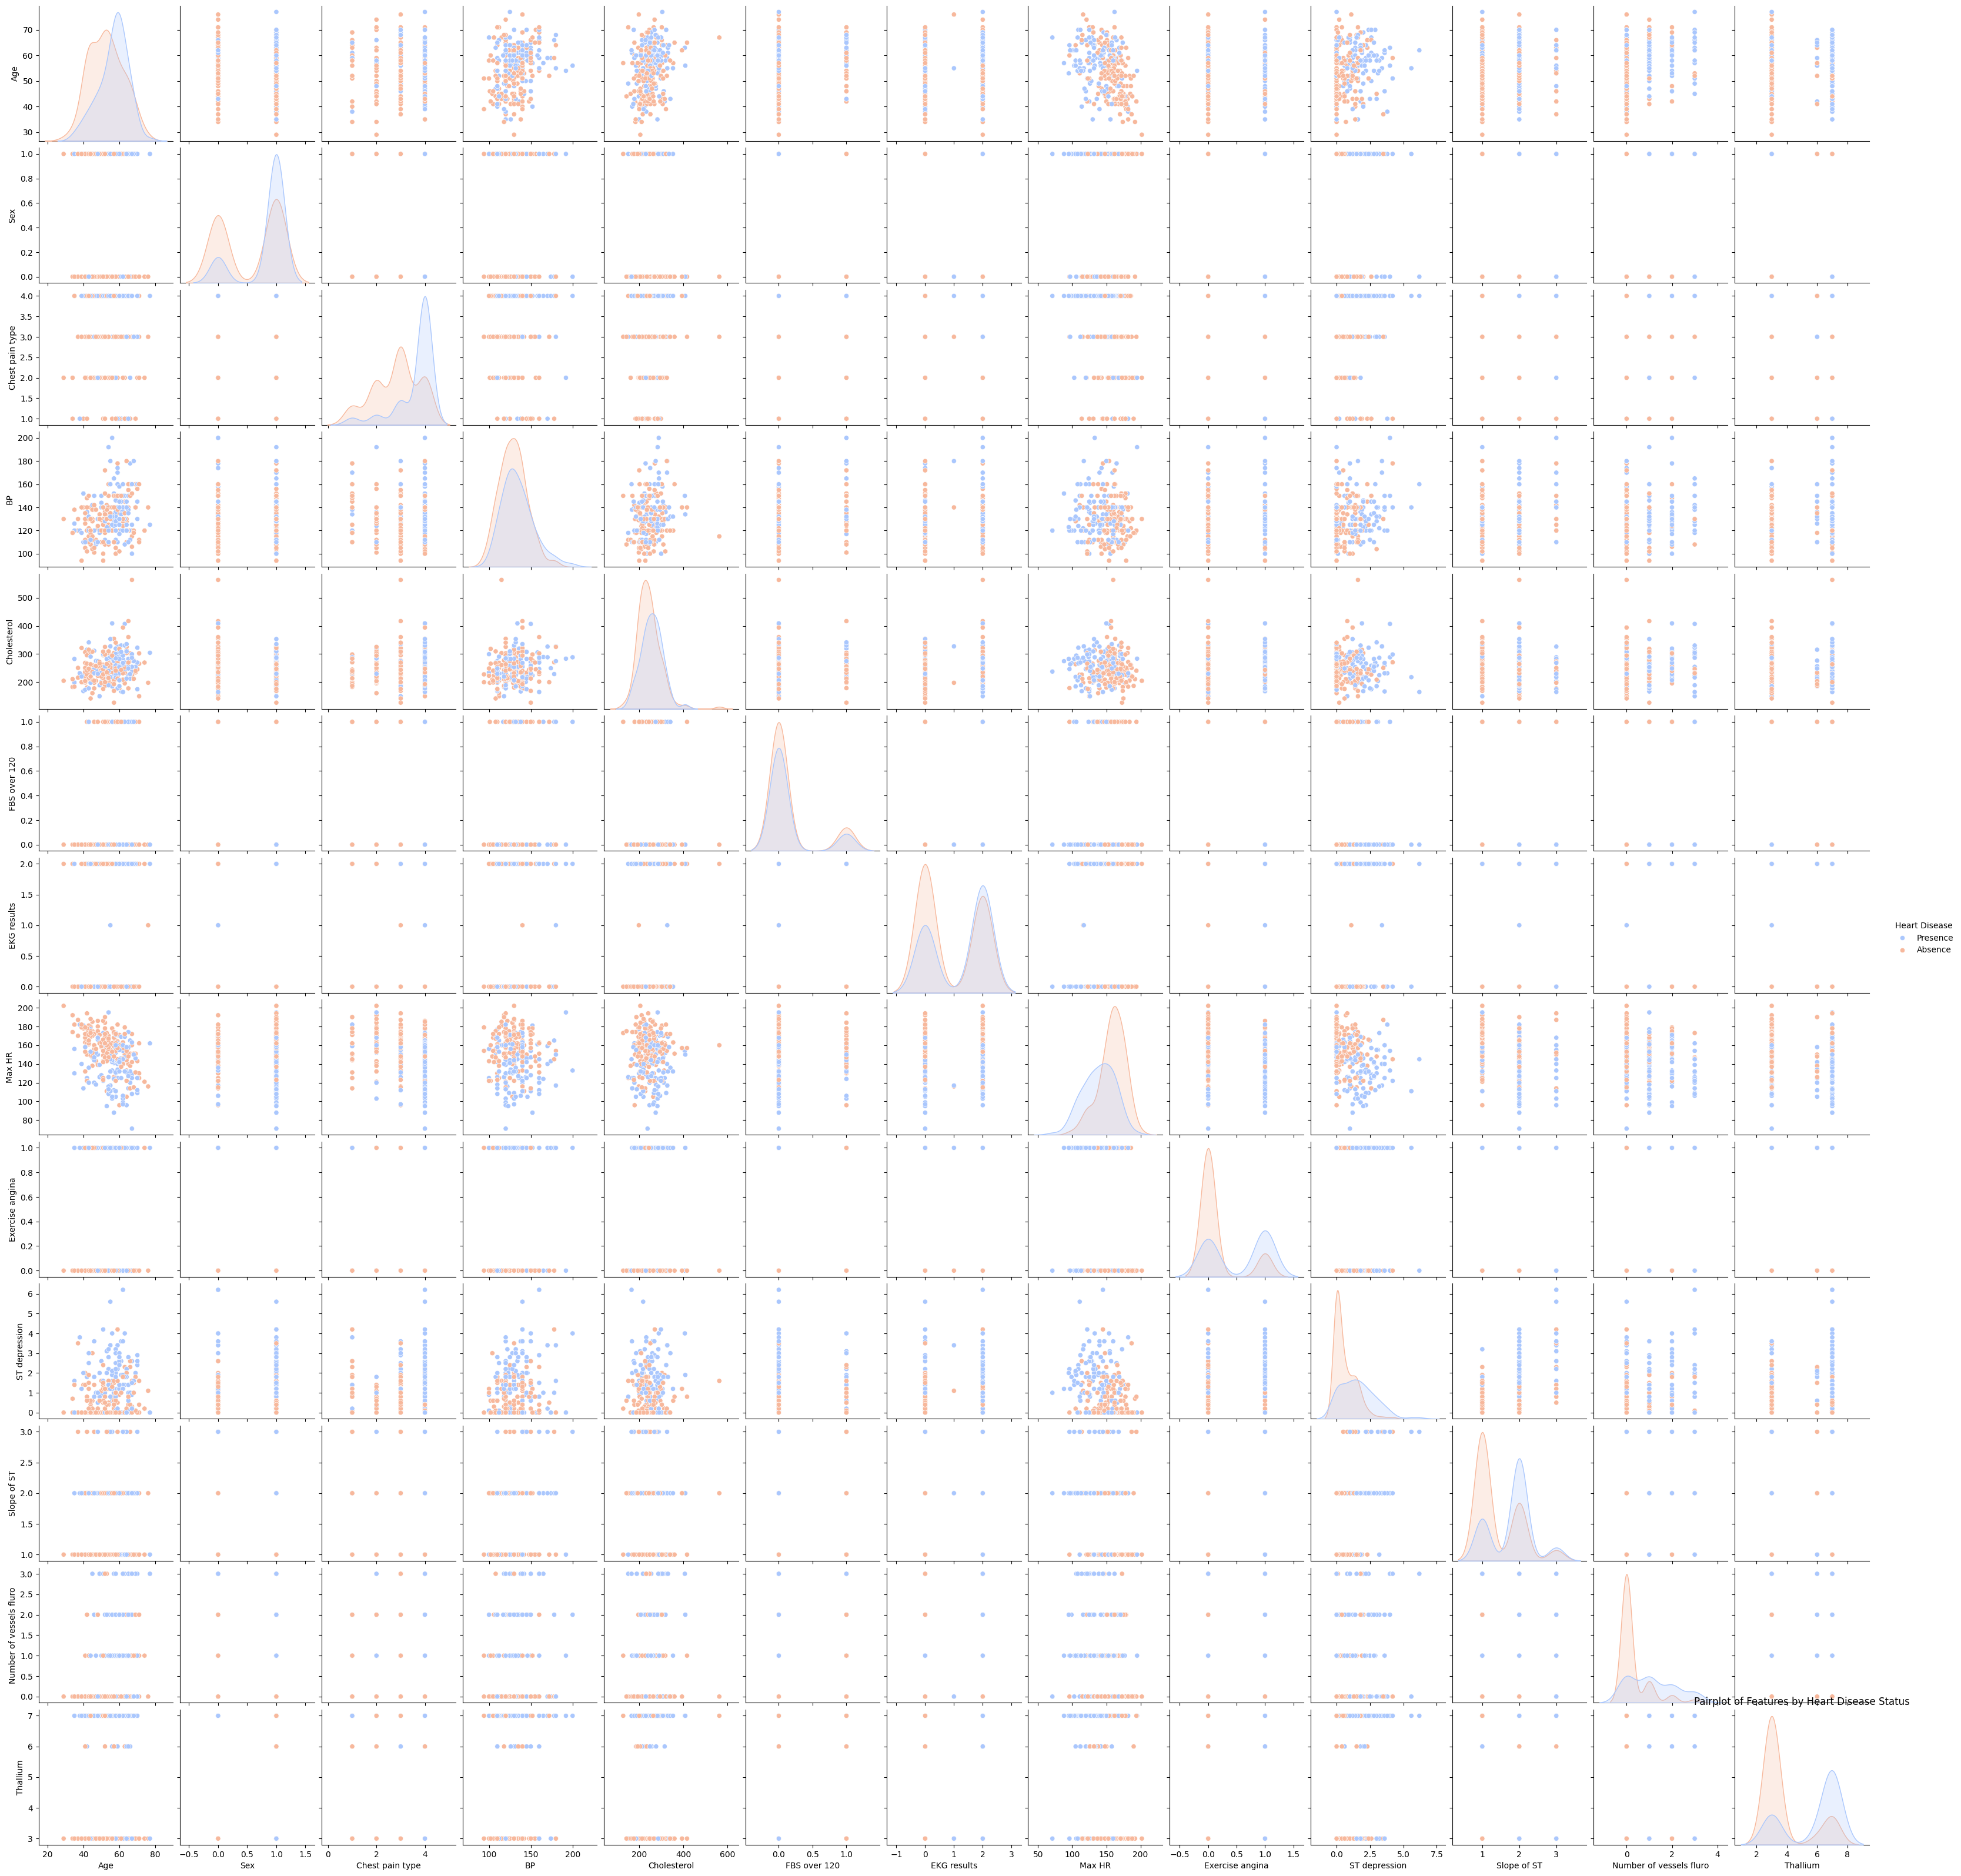

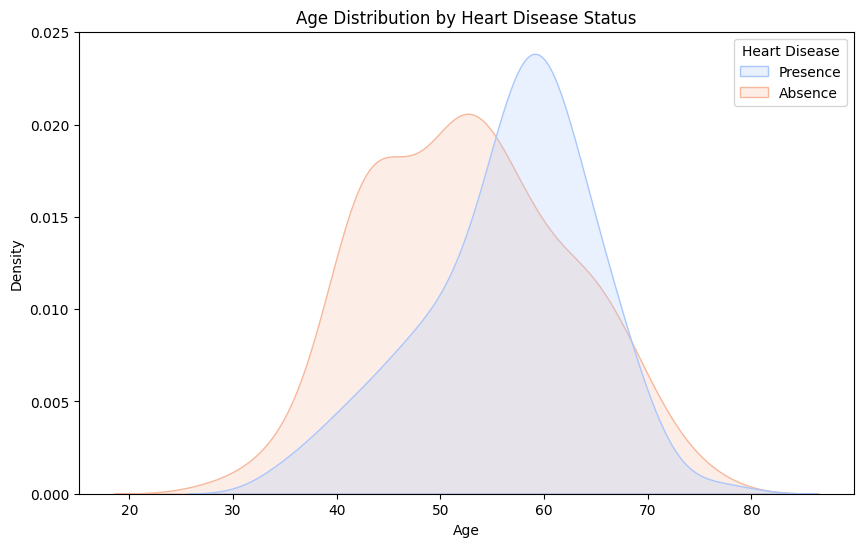

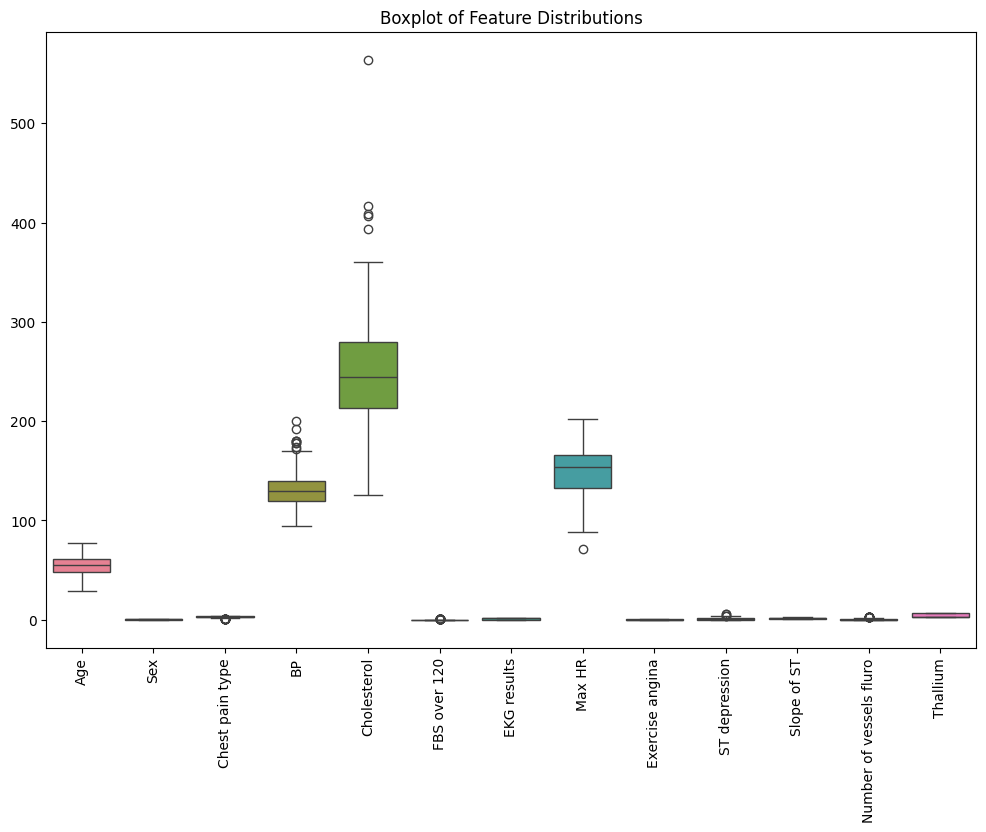

Naive Bayes Model Accuracy: 90.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



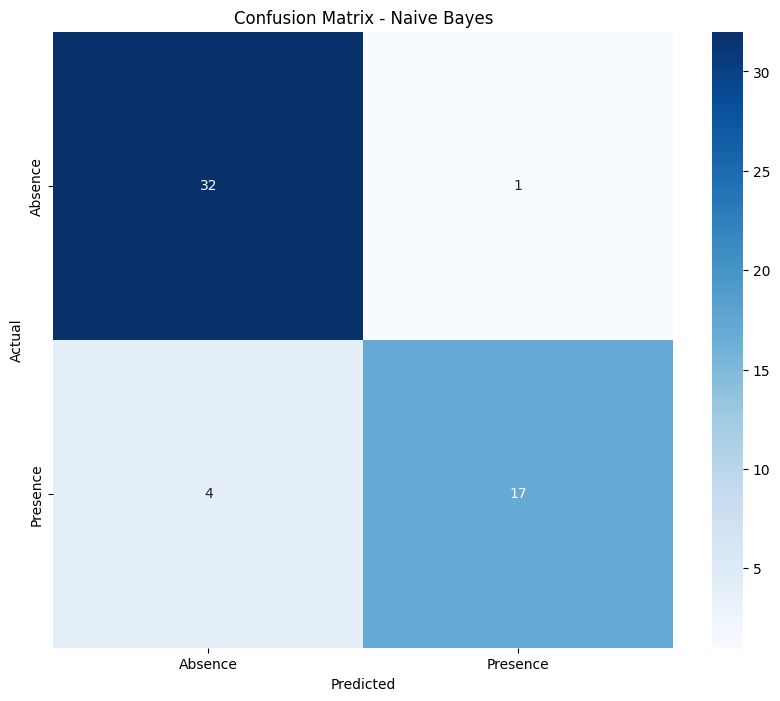

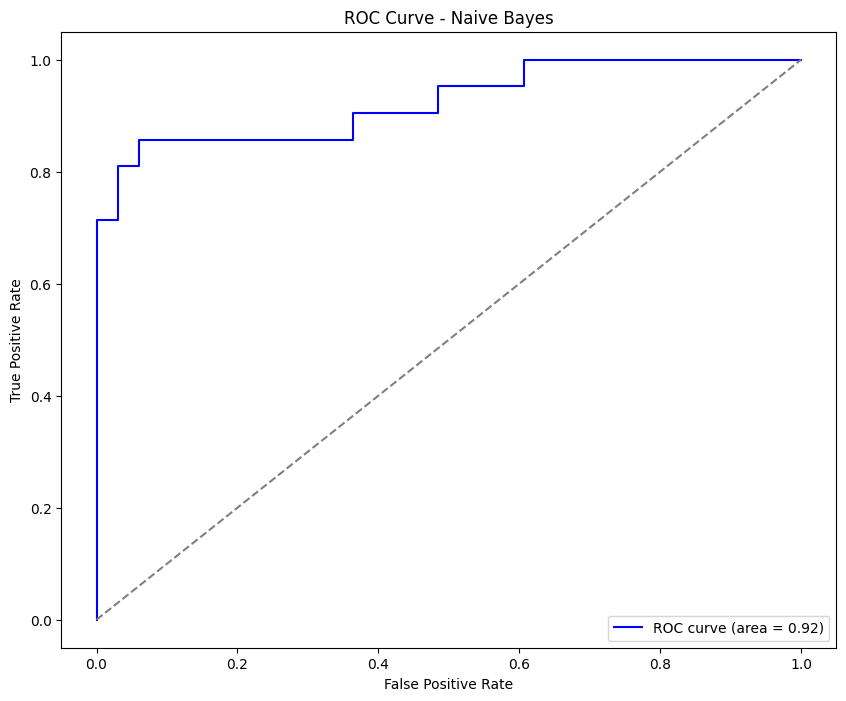

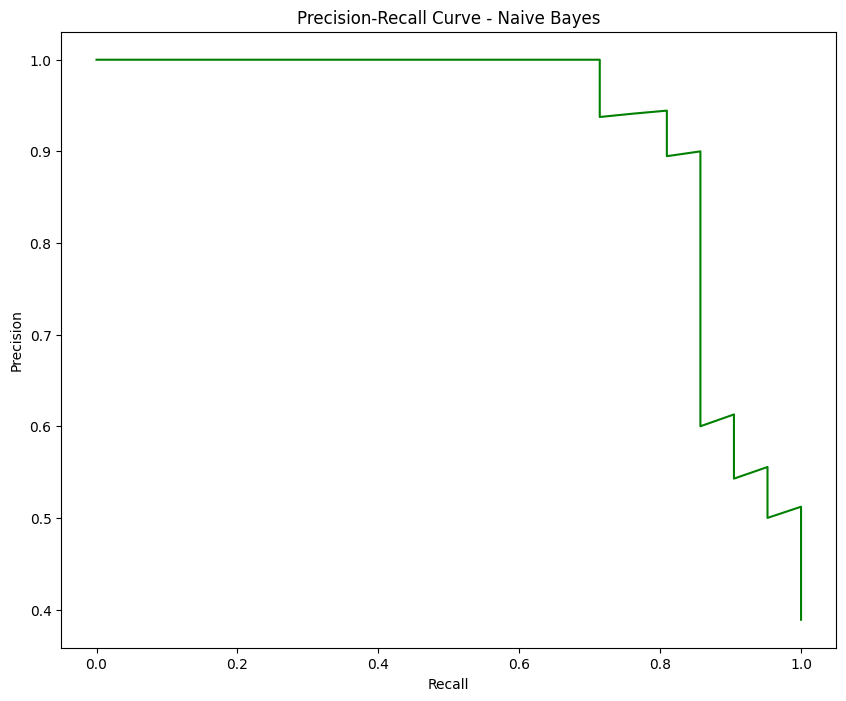

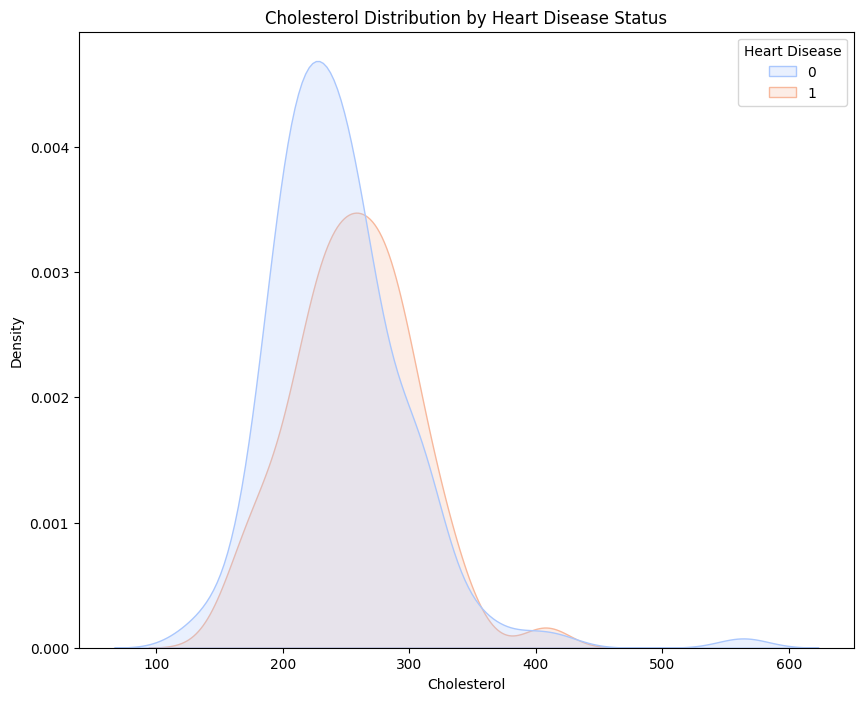

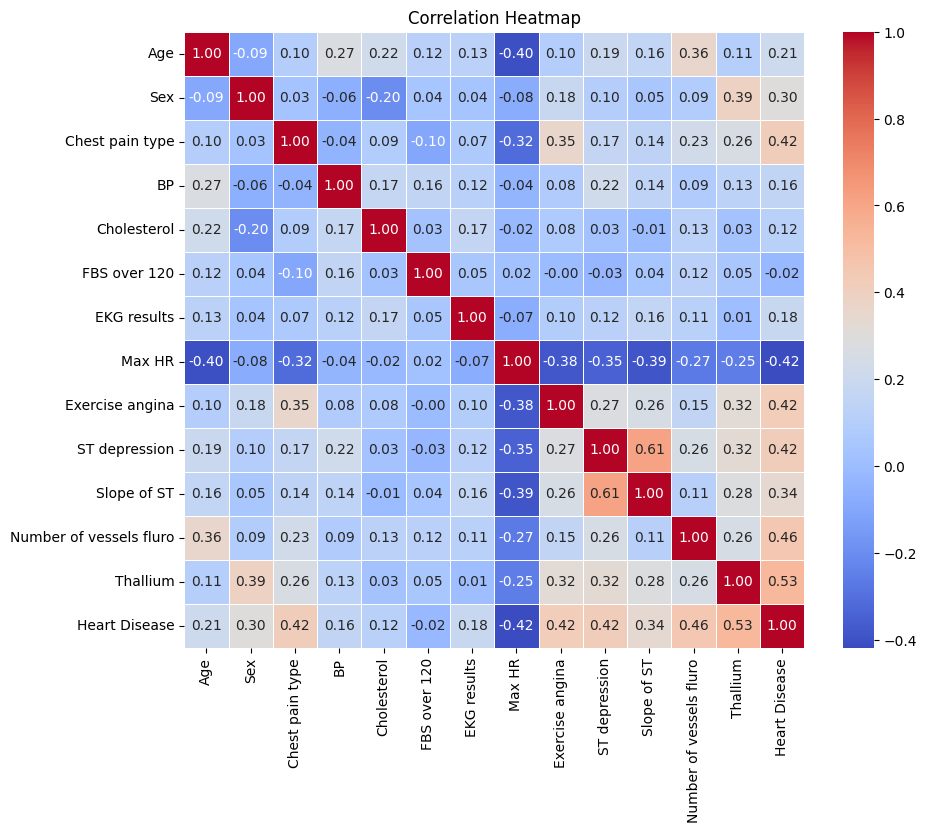

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Set random seeds for reproducibility
np.random.seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Exploratory Data Analysis (EDA)

# 1. Summary Statistics
print("\nSummary Statistics:")
print(data.describe())

# 2. Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 3. Distribution of target variable 'Heart Disease'
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Disease', data=data, palette='coolwarm')
plt.title('Distribution of Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# 4. Pairplot for numerical features
# If there are too many features, you can sample or select a few key ones
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='Heart Disease', palette='coolwarm')
plt.title('Pairplot of Features by Heart Disease Status')
plt.show()

# 5. Distribution of age by heart disease status (assuming 'Age' is a feature)
if 'Age' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x='Age', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Age Distribution by Heart Disease Status')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.show()

# 6. Boxplot of features (useful for identifying outliers)
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('Heart Disease', axis=1))
plt.title('Boxplot of Feature Distributions')
plt.xticks(rotation=90)
plt.show()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


ANN

Summary Statistics:
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952   

<ipython-input-4-0a8aa95c7b56>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=data, palette='coolwarm')


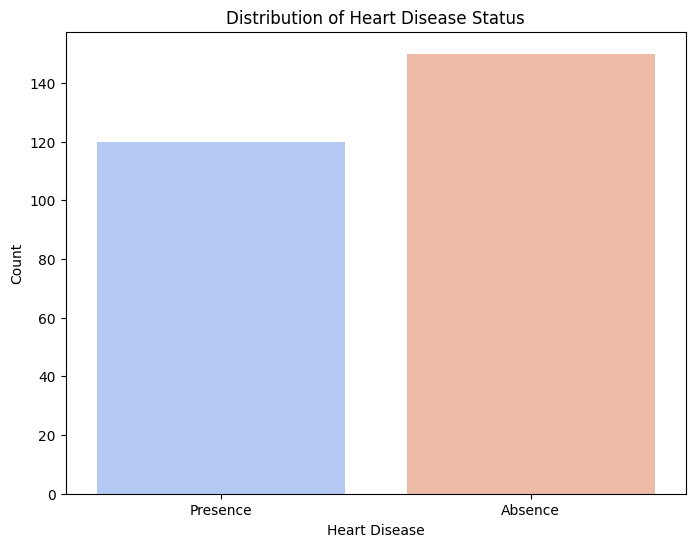

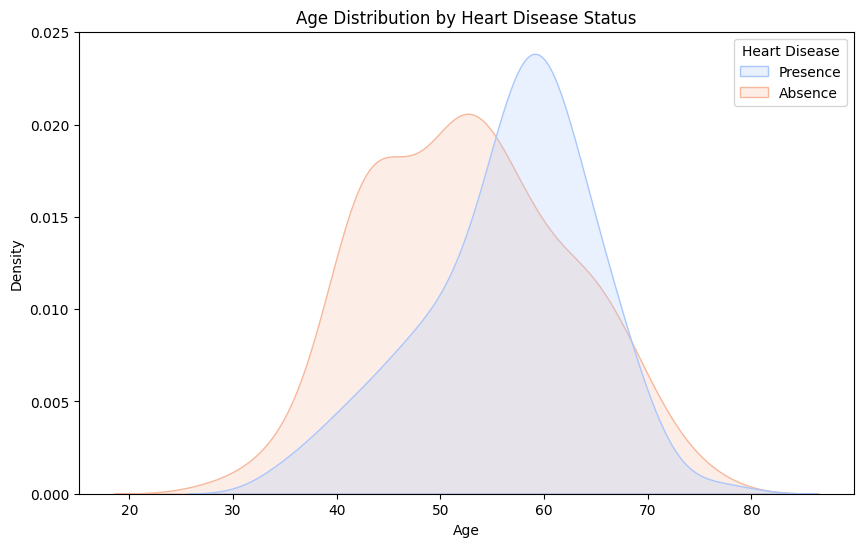

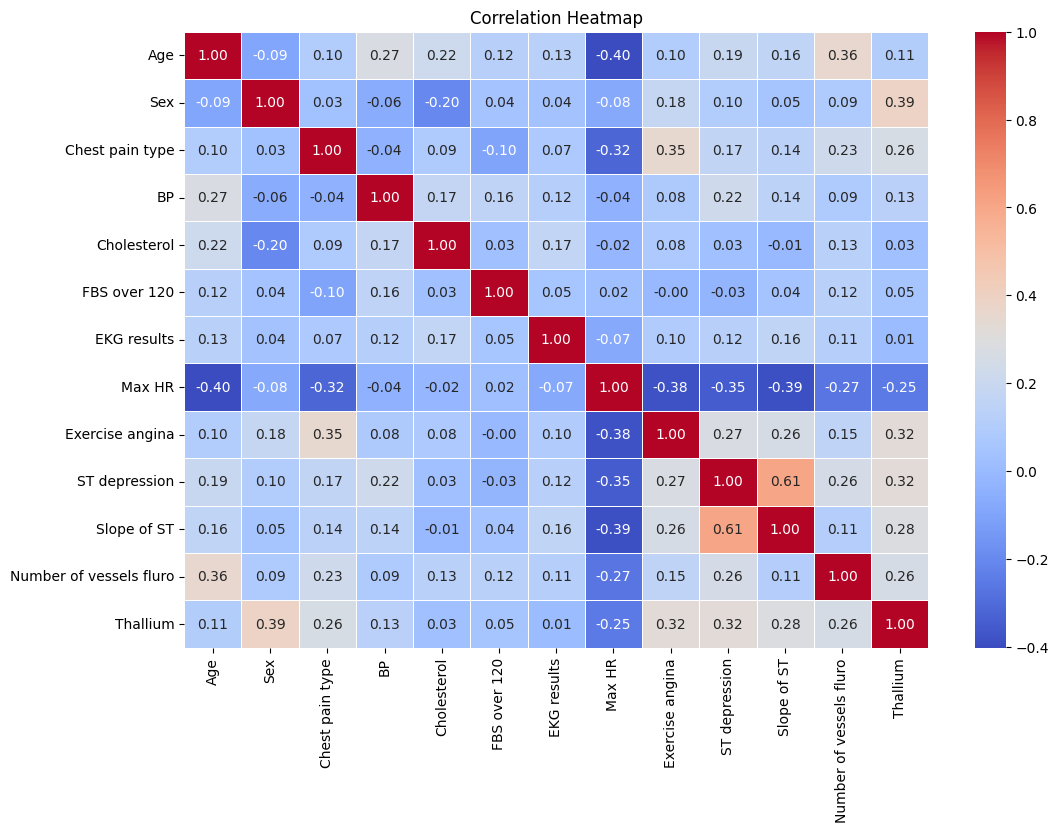

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.7394 - accuracy: 0.3565
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.5602
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.7269
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.8102
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.8472
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.8333
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.8426
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8519
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8565
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8565
Epoch 11/

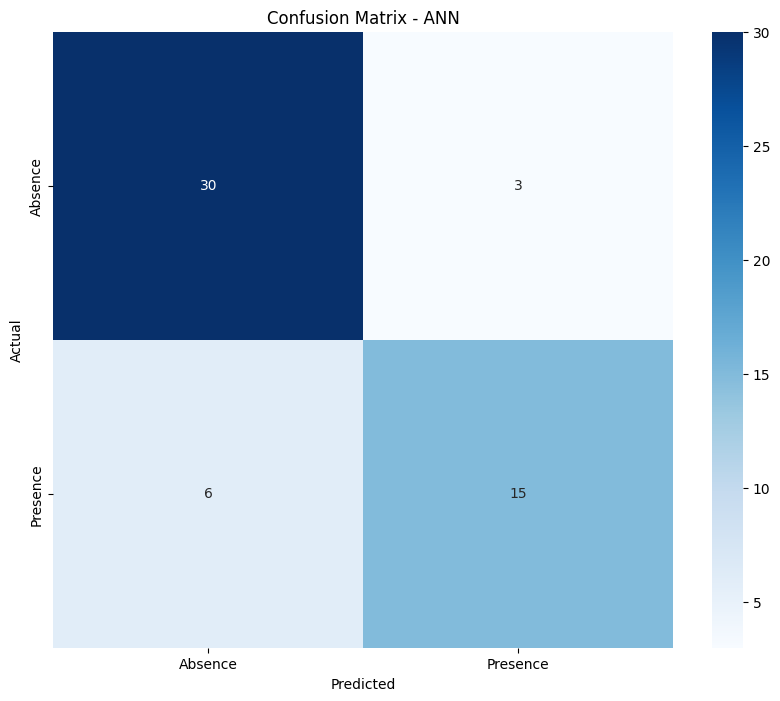

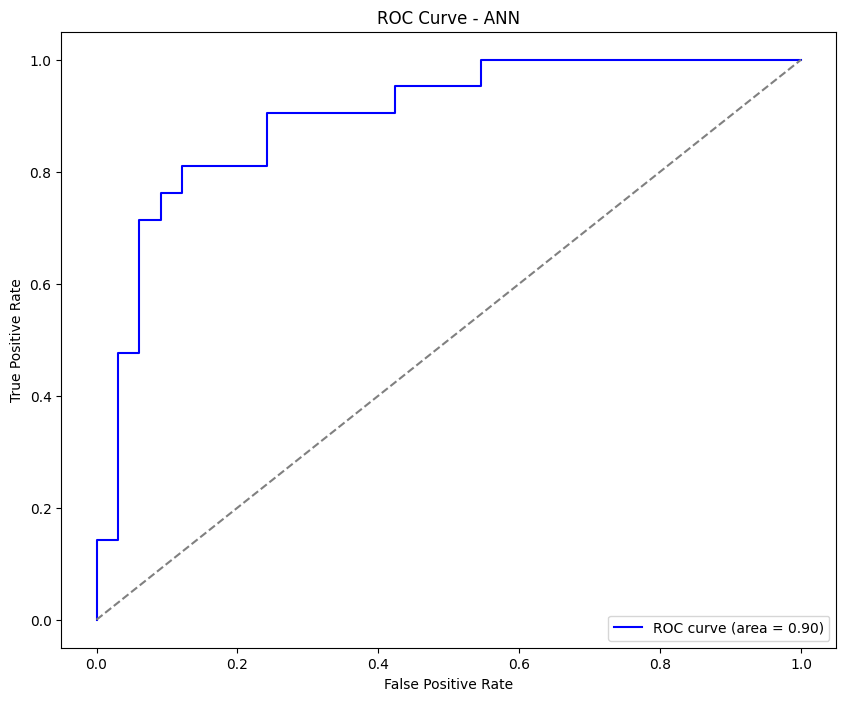

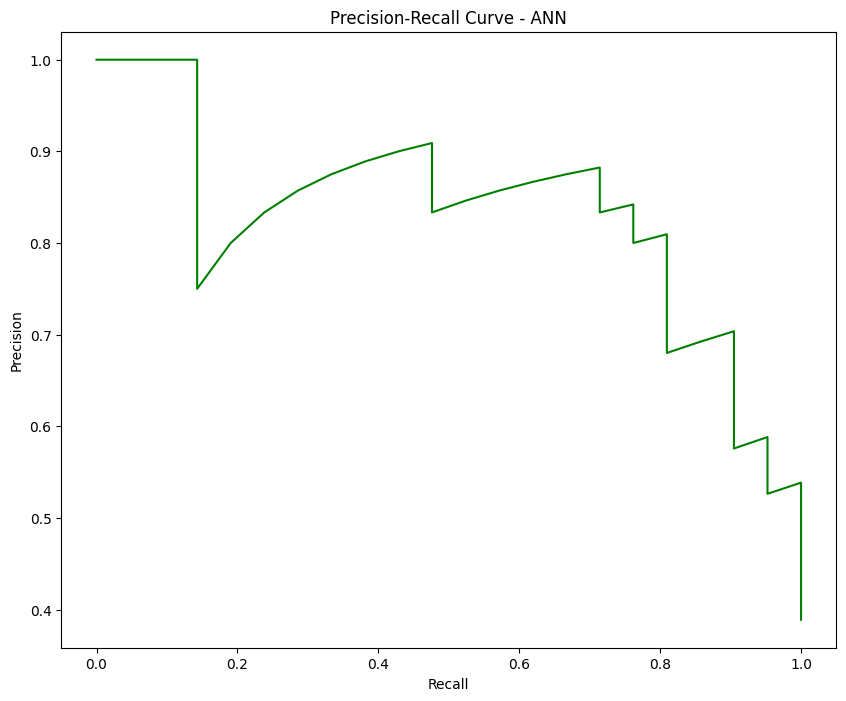

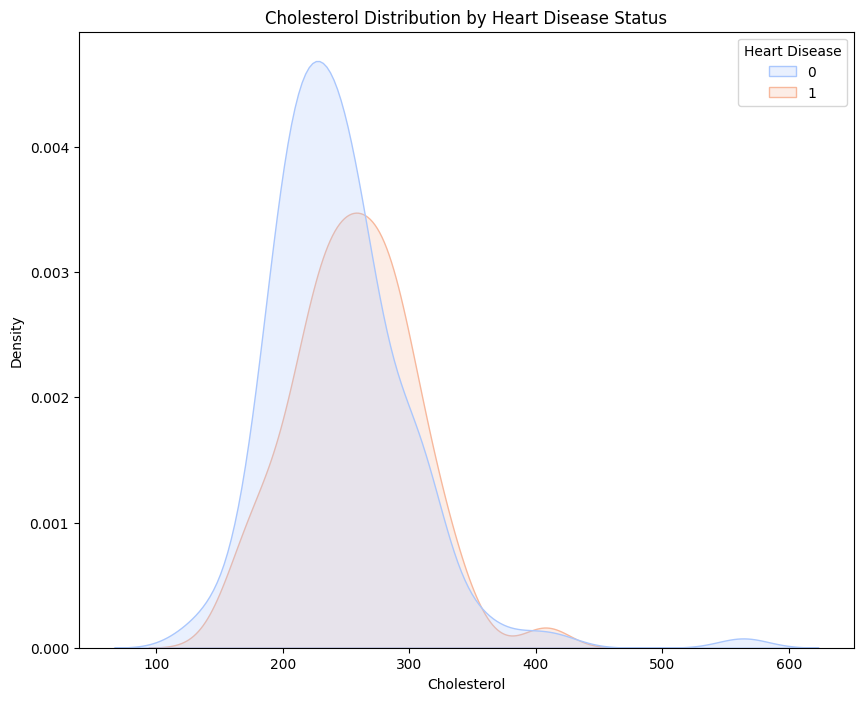

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)

# 1. Summary Statistics
print("Summary Statistics:")
print(data.describe())

# 2. Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 3. Distribution of target variable 'Heart Disease'
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Disease', data=data, palette='coolwarm')
plt.title('Distribution of Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# 4. Distribution of Age by Heart Disease Status (assuming 'Age' exists in the dataset)
if 'Age' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x='Age', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Age Distribution by Heart Disease Status')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.show()

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation Heatmap of the numeric data only
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and build the ANN model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - ANN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ANN')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Drop non-numeric columns (if any)
data = data.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define GAN components

# 1. Generator
def build_generator(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(data.shape[1], activation='tanh')  # Assuming data.shape[1] is the number of features
    ])
    return model

# 2. Discriminator
def build_discriminator(input_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=input_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Instantiate generator and discriminator
generator = build_generator(input_dim=100)  # Latent space dimension
discriminator = build_discriminator(input_dim=data.shape[1])

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GAN model (combine generator and discriminator)
discriminator.trainable = False  # We only want to train the generator in the GAN model
gan_input = layers.Input(shape=(100,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)

gan = keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training the GAN
def train_gan(gan, generator, discriminator, data, epochs=10000, batch_size=32):
    for epoch in range(epochs):
        # Generate random noise for the generator
        noise = np.random.normal(0, 1, size=[batch_size, 100])
        generated_data = generator.predict(noise)

        # Get a random batch of real data
        real_data = data[np.random.randint(0, data.shape[0], size=batch_size)]

        # Combine real and fake data
        combined_data = np.concatenate([real_data, generated_data])

        # Labels for the combined data (1 for real, 0 for fake)
        labels = np.array([1] * batch_size + [0] * batch_size)

        # Train the discriminator
        d_loss = discriminator.train_on_batch(combined_data, labels)

        # Train the generator (wants the discriminator to mistake its output as real)
        noise = np.random.normal(0, 1, size=[batch_size, 100])
        g_loss = gan.train_on_batch(noise, np.array([1] * batch_size))

        # Print the progress
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Discriminator Loss: {d_loss[0]:.4f}, Generator Loss: {g_loss:.4f}')

# Start training the GAN
train_gan(gan, generator, discriminator, data_scaled)

# Generating new data
num_samples = 1000
noise = np.random.normal(0, 1, size=[num_samples, 100])
generated_samples = generator.predict(noise)

# Inverse transform the scaled data
generated_samples = scaler.inverse_transform(generated_samples)

# Create a DataFrame for the generated samples
generated_df = pd.DataFrame(generated_samples, columns=data.columns)

# Display generated data
print(generated_df.head())


1/1 [==============================] - 0s 54ms/step
Epoch 0, Discriminator Loss: 0.6870, Generator Loss: 0.7302
1/1 [==============================] - 0s 21ms/step
